In [1]:
# import libraries
import os
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interpn
from scipy.interpolate import interp1d
import pickle 
import xarray as xr
import matplotlib.colors as colors
import seaborn as sns
import cmocean

# import some home-made functions
import nbimporter

# for mapping
import cartopy.crs as ccrs
# https://cosima-recipes.readthedocs.io/en/latest/tutorials/Making_Maps_with_Cartopy.html
import cartopy.feature as cft
# BIG issue with cartopy: see here https://github.com/SciTools/cartopy/issues/1325 at @jypeter
# I had to download a bunch of stuff myself and put it in ~/.local/share/cartopy/shapefile/.../...
# https://stackoverflow.com/questions/30030328/correct-placement-of-colorbar-relative-to-geo-axes-cartopy
# https://scitools.org.uk/cartopy/docs/v0.15/examples/axes_grid_basic.html
land_110m = cft.NaturalEarthFeature('physical', 'land', '110m', edgecolor='black', facecolor='gray', linewidth=0.5) # continents

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [2]:
data = open("../data/output_data_for_figures/data_fig4.pkl", "rb")
data = pickle.load(data)

In [3]:
FreminPOC_ST_100m_full_matrix_avg = data['FreminPOC_ST_100m_full_matrix_avg']
FseqPOC_ST_100m_full_matrix_avg = data['FseqPOC_ST_100m_full_matrix_avg']
lonT = data['lon']
latT = data['lat']
depthST = data['depthST']
f100_ST = data['f100_ST']

In [4]:
# follow up figure S4
rA = 24 # station A
cA = 5
rB = 70
cB = 5
rC = 49
cC = 122
rD = 63
cD = 54

#stations = np.array([[rA,cA],[rB,cB],[rC,cC],[rD,cD]])
stations_lat = np.array([latT[rA],latT[rB],latT[rC],latT[rD]])
stations_lon = np.array([lonT[cA],lonT[cB],lonT[cC],lonT[cD]])
stations_df = pd.DataFrame({'lat':stations_lat, 'lon':stations_lon, 'name':np.array(['a','b','c','d'])})
stations_df

,lat,lon,name
0,-41.538462,-169.0,a
1,49.450549,-169.0,b
2,7.912088,65.0,c
3,35.604396,-71.0,d


<ipython-input-5-617b54494582>:195: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout() # https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/


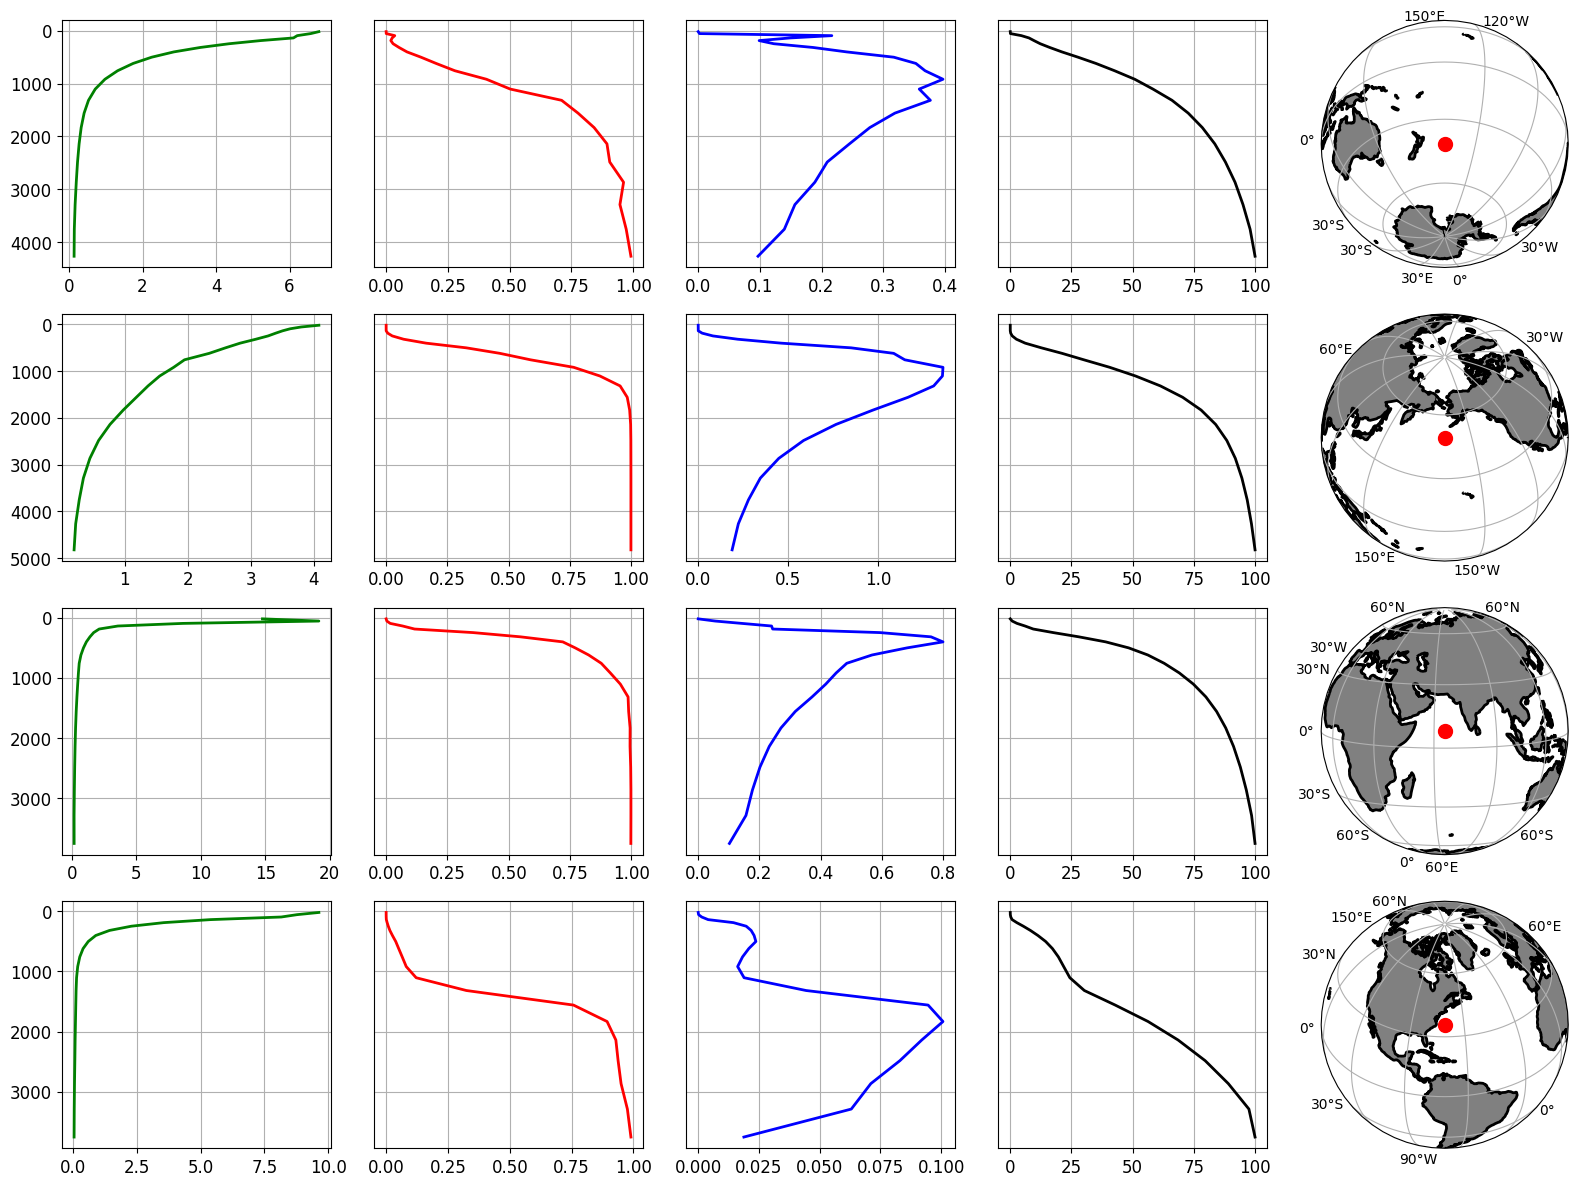

In [5]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout=True, figsize = (16,12))
gs = GridSpec(4, 5, figure=fig)

# station A
r = 24
c = 5
ax1 = fig.add_subplot(gs[0, 0])
ax1 = plt.plot(FreminPOC_ST_100m_full_matrix_avg[r, c, :], depthST, linewidth = 2, color = 'green')
#ax1 = plt.xlabel('f$_{100}$', fontsize = 16)
#ax1 = plt.ylabel('Depth [m]', fontsize = 16)
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='both', which='major', labelsize=12, gridOn = True)

ax2 = fig.add_subplot(gs[0, 1])
ax2 = plt.plot(f100_ST[r, c, :], depthST, linewidth = 2, color = 'red')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='x', which='major', labelsize=12, labelcolor = 'black', gridOn = True)
plt.gca().tick_params(axis='y', which='major', labelsize=12, labelcolor = 'black', gridOn = True, tick1On = False,
                     label1On = False)

ax3 = fig.add_subplot(gs[0, 2])
ax3 = plt.plot(FseqPOC_ST_100m_full_matrix_avg[r, c, :], depthST, linewidth = 2, color = 'blue')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='x', which='major', labelsize=12, labelcolor = 'black', gridOn = True)
plt.gca().tick_params(axis='y', which='major', labelsize=12, labelcolor = 'black', gridOn = True, tick1On = False,
                     label1On = False)

ax4 = fig.add_subplot(gs[0, 3])
accumulation_percentage = np.cumsum(FseqPOC_ST_100m_full_matrix_avg[r, c, :]/np.nansum(FseqPOC_ST_100m_full_matrix_avg[r, c, :]))*100
ax4 = plt.plot(accumulation_percentage, depthST, linewidth = 2, color = 'black')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='x', which='major', labelsize=12, labelcolor = 'black', gridOn = True)
plt.gca().tick_params(axis='y', which='major', labelsize=12, labelcolor = 'black', gridOn = True, tick1On = False,
                     label1On = False)

ax5 = fig.add_subplot(gs[0, 4], projection=ccrs.Orthographic(central_longitude=-169, central_latitude=-41.53))
ax5.add_feature(land_110m)
ax5.coastlines(resolution='110m', color='black', linestyle='-', alpha=1, linewidth = 2)
ax5.scatter(stations_lon[0], stations_lat[0], transform = ccrs.PlateCarree(), c = "red", marker = ".", s = 400)
ax5.set_global()
gl = ax5.gridlines(draw_labels=True)
gl.bottom_labels = True
gl.right_labels = False
gl.top_labels = False
gl.xlocator = mticker.FixedLocator([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150])
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlines = True
gl.ylines = True

# station B
index_depth = 24
r = 70
c = 5
ax6 = fig.add_subplot(gs[1, 0])
ax6 = plt.plot(FreminPOC_ST_100m_full_matrix_avg[r, c, :], depthST, linewidth = 2, color = 'green')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='both', which='major', labelsize=12, gridOn = True)

ax7 = fig.add_subplot(gs[1, 1])
ax7 = plt.plot(f100_ST[r, c, :], depthST, linewidth = 2, color = 'red')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='x', which='major', labelsize=12, labelcolor = 'black', gridOn = True)
plt.gca().tick_params(axis='y', which='major', labelsize=12, labelcolor = 'black', gridOn = True, tick1On = False,
                     label1On = False)

ax8 = fig.add_subplot(gs[1, 2])
ax8 = plt.plot(FseqPOC_ST_100m_full_matrix_avg[r, c, :], depthST, linewidth = 2, color = 'blue')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='x', which='major', labelsize=12, labelcolor = 'black', gridOn = True)
plt.gca().tick_params(axis='y', which='major', labelsize=12, labelcolor = 'black', gridOn = True, tick1On = False,
                     label1On = False)

ax9 = fig.add_subplot(gs[1, 3])
accumulation_percentage = np.cumsum(FseqPOC_ST_100m_full_matrix_avg[r, c, :]/np.nansum(FseqPOC_ST_100m_full_matrix_avg[r, c, :]))*100
ax9 = plt.plot(accumulation_percentage, depthST, linewidth = 2, color = 'black')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='x', which='major', labelsize=12, labelcolor = 'black', gridOn = True)
plt.gca().tick_params(axis='y', which='major', labelsize=12, labelcolor = 'black', gridOn = True, tick1On = False,
                     label1On = False)

ax10 = fig.add_subplot(gs[1, 4], projection=ccrs.Orthographic(central_longitude=-169, central_latitude=49.45))
ax10.add_feature(land_110m)
ax10.coastlines(resolution='110m', color='black', linestyle='-', alpha=1, linewidth = 2)
ax10.scatter(stations_lon[1], stations_lat[1], transform = ccrs.PlateCarree(), c = "red", marker = ".", s = 400)
ax10.set_global()
gl = ax10.gridlines(draw_labels=True)
gl.bottom_labels = True
gl.right_labels = False
gl.top_labels = False
gl.xlocator = mticker.FixedLocator([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150])
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlines = True
gl.ylines = True

# panel C
r = 49
c = 122
ax11 = fig.add_subplot(gs[2, 0])
ax11 = plt.plot(FreminPOC_ST_100m_full_matrix_avg[r, c, :], depthST, linewidth = 2, color = 'green')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='both', which='major', labelsize=12, gridOn = True)

ax12 = fig.add_subplot(gs[2, 1])
ax12 = plt.plot(f100_ST[r, c, :], depthST, linewidth = 2, color = 'red')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='x', which='major', labelsize=12, labelcolor = 'black', gridOn = True)
plt.gca().tick_params(axis='y', which='major', labelsize=12, labelcolor = 'black', gridOn = True, tick1On = False,
                     label1On = False)

ax13 = fig.add_subplot(gs[2, 2])
ax13 = plt.plot(FseqPOC_ST_100m_full_matrix_avg[r, c, :], depthST, linewidth = 2, color = 'blue')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='x', which='major', labelsize=12, labelcolor = 'black', gridOn = True)
plt.gca().tick_params(axis='y', which='major', labelsize=12, labelcolor = 'black', gridOn = True, tick1On = False,
                     label1On = False)

ax14 = fig.add_subplot(gs[2, 3])
accumulation_percentage = np.cumsum(FseqPOC_ST_100m_full_matrix_avg[r, c, :]/np.nansum(FseqPOC_ST_100m_full_matrix_avg[r, c, :]))*100
ax14 = plt.plot(accumulation_percentage, depthST, linewidth = 2, color = 'black')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='x', which='major', labelsize=12, labelcolor = 'black', gridOn = True)
plt.gca().tick_params(axis='y', which='major', labelsize=12, labelcolor = 'black', gridOn = True, tick1On = False,
                     label1On = False)

ax15 = fig.add_subplot(gs[2, 4], projection=ccrs.Orthographic(central_longitude=65, central_latitude=7.91))
ax15.add_feature(land_110m)
ax15.coastlines(resolution='110m', color='black', linestyle='-', alpha=1, linewidth = 2)
ax15.scatter(stations_lon[2], stations_lat[2], transform = ccrs.PlateCarree(), c = "red", marker = ".", s = 400)
ax15.set_global()
gl = ax15.gridlines(draw_labels=True)
gl.bottom_labels = True
gl.right_labels = False
gl.top_labels = False
gl.xlocator = mticker.FixedLocator([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150])
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlines = True
gl.ylines = True

# panel C
r = 63
c = 54
# r = 30
# c = 30
ax16 = fig.add_subplot(gs[3, 0])
ax16 = plt.plot(FreminPOC_ST_100m_full_matrix_avg[r, c, :], depthST, linewidth = 2, color = 'green')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='both', which='major', labelsize=12, gridOn = True)

ax17 = fig.add_subplot(gs[3, 1])
ax17 = plt.plot(f100_ST[r, c, :], depthST, linewidth = 2, color = 'red')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='x', which='major', labelsize=12, labelcolor = 'black', gridOn = True)
plt.gca().tick_params(axis='y', which='major', labelsize=12, labelcolor = 'black', gridOn = True, tick1On = False,
                     label1On = False)

ax18 = fig.add_subplot(gs[3, 2])
ax18 = plt.plot(FseqPOC_ST_100m_full_matrix_avg[r, c, :], depthST, linewidth = 2, color = 'blue')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='x', which='major', labelsize=12, labelcolor = 'black', gridOn = True)
plt.gca().tick_params(axis='y', which='major', labelsize=12, labelcolor = 'black', gridOn = True, tick1On = False,
                     label1On = False)

ax19 = fig.add_subplot(gs[3, 3])
accumulation_percentage = np.cumsum(FseqPOC_ST_100m_full_matrix_avg[r, c, :]/np.nansum(FseqPOC_ST_100m_full_matrix_avg[r, c, :]))*100
ax19 = plt.plot(accumulation_percentage, depthST, linewidth = 2, color = 'black')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='x', which='major', labelsize=12, labelcolor = 'black', gridOn = True)
plt.gca().tick_params(axis='y', which='major', labelsize=12, labelcolor = 'black', gridOn = True, tick1On = False,
                     label1On = False)

ax20 = fig.add_subplot(gs[3, 4], projection=ccrs.Orthographic(central_longitude=-71, central_latitude=35.6))
ax20.add_feature(land_110m)
ax20.coastlines(resolution='110m', color='black', linestyle='-', alpha=1, linewidth = 2)
ax20.scatter(stations_lon[3], stations_lat[3], transform = ccrs.PlateCarree(), c = "red", marker = ".", s = 400)
ax20.set_global()
gl = ax20.gridlines(draw_labels=True)
gl.bottom_labels = True
gl.right_labels = False
gl.top_labels = False
gl.xlocator = mticker.FixedLocator([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150])
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlines = True
gl.ylines = True

# increase spaces between subplots
plt.tight_layout() # https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/

# set the spacing between subplots
# plt.subplots_adjust(left=0.1, 
#                     right=0.9)

# save fig
plt.savefig('Fig4.jpg', bbox_inches = "tight", dpi=300)
plt.show()